In [1]:
import mysql.connector
import pandas as pd
from pandas import set_option
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
mySQLconnection = mysql.connector.connect(user='foouser',password='F88Pa%%**',host='134.209.144.239',database='stocksdb')
sql_select_Query = "select * from interview"
print(mySQLconnection)
cursor = mySQLconnection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()

#closing database connection.
if(mySQLconnection .is_connected()):
    cursor.close()
    mySQLconnection.close()
    print("MySQL connection is closed")
print("Total number of rows in stocksdb  is - ", cursor.rowcount)
data = pd.DataFrame(records) 
print (data.shape)
print(data.head())

MySQL connection is closed
Total number of rows in stocksdb  is -  500000
(500000, 9)
              0   1                   2       3        4        5        6  \
0  INE545A01016 NaT 2018-01-01 09:15:00  2419.0  2436.00  2408.90  2435.25   
1  INE545A01016 NaT 2018-01-01 09:16:00  2435.0  2440.00  2426.45  2439.00   
2  INE545A01016 NaT 2018-01-01 09:17:00  2439.7  2439.70  2422.10  2424.95   
3  INE545A01016 NaT 2018-01-01 09:18:00  2420.0  2424.50  2386.50  2395.00   
4  INE545A01016 NaT 2018-01-01 09:19:00  2395.0  2413.95  2394.70  2409.85   

       7   8  
0  10281 NaN  
1  13315 NaN  
2   3760 NaN  
3  11653 NaN  
4   7744 NaN  


      3     4     5     6     7     8
3  1.00  1.00  1.00  1.00  0.09  0.09
4  1.00  1.00  1.00  1.00  0.09  0.09
5  1.00  1.00  1.00  1.00  0.09  0.08
6  1.00  1.00  1.00  1.00  0.09  0.09
7  0.09  0.09  0.09  0.09  1.00  1.00
8  0.09  0.09  0.08  0.09  1.00  1.00


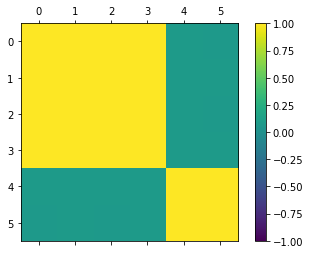

In [2]:
#To know about the correlation between the attributes 
from pandas import set_option
pd.set_option('display.width',None)
pd.set_option('precision',2)
correlation=data.corr(method='pearson')
print(correlation)
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(1,6,1)
pyplot.show()

In [ ]:

def matrixmult (A, B):
    C = [[0 for col in range(len(B[0]))] for row in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k]*B[k][j]
        print ('\n')
    return C
    
array = data.values
indep_var1= array[:,3:7]
weights=[[1],[1],[1],[1]]
x= matrixmult(indep_var1,weights)
share_point = np.array(x) 
share_value = array[:,7:8]
test_size=0.80
seed =51
X_train,X_test,Y_train,Y_test=train_test_split(share_point,share_value,test_size=test_size,random_state=seed)
model=LinearRegression()
model.fit(X_train,Y_train)